## Final Report

##### Project Overview / Goals
- 
- 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from prepare import prep_telco


#### Data Acquisition and Data Cleaning

In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
train, validate, test = prep_telco(df)
train.shape, validate.shape, test.shape

((3943, 46), (1691, 46), (1409, 46))

#### Data Exploration

Question 1 - is the customer's choice of payment type related to customer churn

Viz:

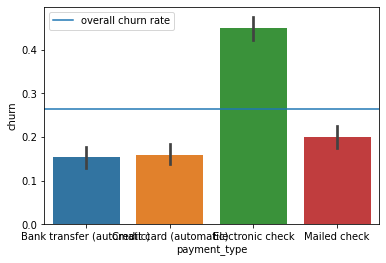

In [5]:
churn_mean = train.churn.mean()
sns.barplot(x='payment_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

Stats:

In [6]:
pay_cross = pd.crosstab(train.churn, train.payment_type)
pay_cross

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,738,727,731,701
1,135,138,597,176


In [8]:
chi2, p, degf, expected = stats.chi2_contingency(pay_cross)
print('Observed\n')
print(pay_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('---\n')
alpha = 0.01
if p < alpha:
    print('There is a statistically significant relationship between payment type and customer churn')

Observed

[[738 727 731 701]
 [135 138 597 176]]
---
Expected

[[641 635 975 644]
 [231 229 352 232]]
---

chi^2 = 354.5801
p     = 0.0000
---

There is a statistically significant relationship between payment type and customer churn


Question 2 - is the customer's internet service type related to customer churn

viz:

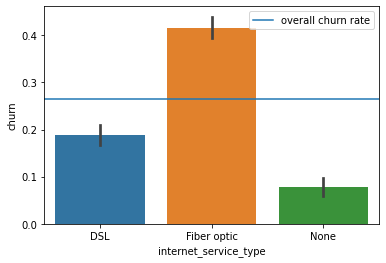

In [9]:
churn_mean = train.churn.mean()
sns.barplot(x='internet_service_type', y='churn', data=train)
plt.axhline(churn_mean, label='overall churn rate')
plt.legend()
plt.show()

Stats:

In [10]:
internet_cross = pd.crosstab(train.churn, train.internet_service_type)
internet_cross

internet_service_type,DSL,Fiber optic,None
churn,,,
0,1095,1019,783
1,254,726,66


In [11]:
chi2, p, degf, expected = stats.chi2_contingency(internet_cross)
print('Observed\n')
print(internet_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('---\n')
alpha = 0.01
if p < alpha:
    print('There is a statistically significant relationship between internet service type and customer churn')

Observed

[[1095 1019  783]
 [ 254  726   66]]
---
Expected

[[ 991 1282  623]
 [ 357  462  225]]
---

chi^2 = 397.7389
p     = 0.0000
---

There is a statistically significant relationship between internet service type and customer churn


Question 3 - is customer participation in our support and back up programs related to customer churn

Viz:

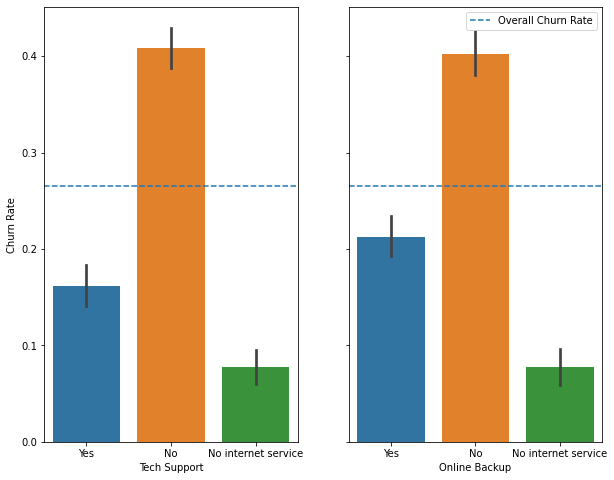

In [12]:
churn_mean = train.churn.mean()
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
sns.barplot(x='tech_support', y='churn', data=train, ax=ax[0])
sns.barplot(x='online_backup', y='churn', data=train, ax=ax[1])
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
ax[0].set_xlabel('Tech Support')
ax[0].set_ylabel('Churn Rate')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.xlabel('Online Backup')
plt.ylabel('')
plt.legend()
plt.show()

Stats:

In [13]:
tech_cross = pd.crosstab(train.churn, train.tech_support)
tech_cross

tech_support,No,No internet service,Yes
churn,,,
0,1146,783,968
1,793,66,187


In [14]:
chi2, p, degf, expected = stats.chi2_contingency(tech_cross)
print('Observed\n')
print(tech_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('---\n')
alpha = 0.01
if p < alpha:
    print('There is a statistically significant relationship between having tech support and customer churn')

Observed

[[1146  783  968]
 [ 793   66  187]]
---
Expected

[[1424  623  848]
 [ 514  225  306]]
---

chi^2 = 421.9453
p     = 0.0000
---

There is a statistically significant relationship between having tech support and customer churn


Question 4 - is customer participation in our security and protection programs related to customer churn rate

viz:

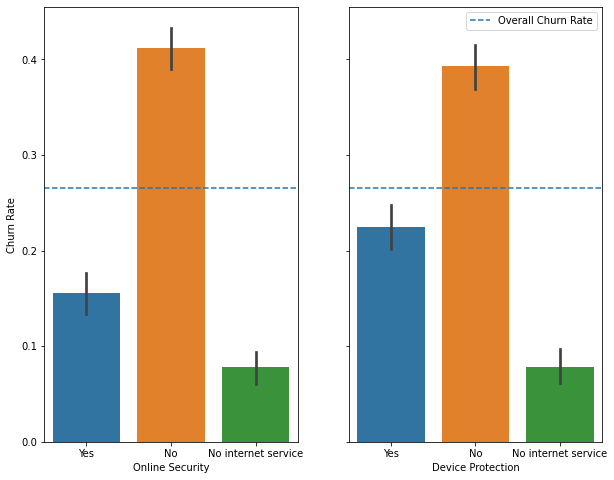

In [15]:
churn_mean = train.churn.mean()
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10,8))
sns.barplot(x='online_security', y='churn', data=train, ax=ax[0])
sns.barplot(x='device_protection', y='churn', data=train, ax=ax[1])
ax[0].axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
ax[0].set_xlabel('Online Security')
ax[0].set_ylabel('Churn Rate')
plt.axhline(churn_mean, label='Overall Churn Rate', linestyle='--')
plt.xlabel('Device Protection')
plt.ylabel('')
plt.legend()
plt.show()

stats:

In [16]:
secur_cross = pd.crosstab(train.churn, train.online_security)
secur_cross

online_security,No,No internet service,Yes
churn,,,
0,1145,783,969
1,801,66,179


In [18]:
chi2, p, degf, expected = stats.chi2_contingency(secur_cross)
print('Observed\n')
print(internet_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('---\n')
alpha = 0.01
if p < alpha:
    print('There is a statistically significant relationship')

Observed

[[1095 1019  783]
 [ 254  726   66]]
---
Expected

[[1429  623  843]
 [ 516  225  304]]
---

chi^2 = 437.4420
p     = 0.0000
---

There is a statistically significant relationship


#### Data Modeling

Training and Validating the models

In [19]:
x_cols = ['tech_support_No internet service', 
          'tech_support_Yes', 'online_security_No internet service', 
          'online_backup_No internet service', 'online_security_Yes', 'online_backup_Yes', 
          'device_protection_No internet service', 'device_protection_Yes', 'internet_service_type_Fiber optic', 
          'internet_service_type_None', 'pay_credit', 'pay_mail', 'pay_elec']

In [20]:
x_train = train[x_cols]
y_train = train[['churn']]
x_val = validate[x_cols]
y_val = validate[['churn']]
x_test = test[x_cols]
y_test = test[['churn']]

---

Decision Tree Model

In [21]:
tree = DecisionTreeClassifier(max_depth=8, random_state=123)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.814041,0.900587,0.855129,2897.000000
1,0.609756,0.430210,0.504484,1046.000000
accuracy,0.775805,0.775805,0.775805,0.775805
macro avg,0.711898,0.665399,0.679807,3943.000000
weighted avg,0.759848,0.775805,0.762110,3943.000000


In [22]:
y_val_pred = tree.predict(x_val)
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.820762,0.884863,0.851608,1242.000000
1,0.593750,0.465479,0.521848,449.000000
accuracy,0.773507,0.773507,0.773507,0.773507
macro avg,0.707256,0.675171,0.686728,1691.000000
weighted avg,0.760485,0.773507,0.764049,1691.000000


KNN Model

In [23]:
clf = KNN(n_neighbors=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.827839,0.858129,0.842712,2897.000000
1,0.562766,0.505736,0.532729,1046.000000
accuracy,0.764646,0.764646,0.764646,0.764646
macro avg,0.695302,0.681933,0.687720,3943.000000
weighted avg,0.757520,0.764646,0.760480,3943.000000


In [24]:
y_val_pred = clf.predict(x_val)
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.838529,0.844605,0.841556,1242.00000
1,0.561364,0.550111,0.555681,449.00000
accuracy,0.766410,0.766410,0.766410,0.76641
macro avg,0.699946,0.697358,0.698618,1691.00000
weighted avg,0.764935,0.766410,0.765650,1691.00000


Logistic Regression Model

In [25]:
logit = LogisticRegression(C=1, random_state=123)
logit.fit(x_train, y_train)
y_pred = logit.predict(x_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.803338,0.913704,0.854974,2897.000000
1,0.614198,0.380497,0.469894,1046.000000
accuracy,0.772255,0.772255,0.772255,0.772255
macro avg,0.708768,0.647100,0.662434,3943.000000
weighted avg,0.753163,0.772255,0.752820,3943.000000


In [27]:
y_val_pred = logit.predict(x_val)
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.802847,0.908213,0.852286,1242.000000
1,0.601399,0.383073,0.468027,449.000000
accuracy,0.768776,0.768776,0.768776,0.768776
macro avg,0.702123,0.645643,0.660156,1691.000000
weighted avg,0.749358,0.768776,0.750256,1691.000000


---

##### Best model selection:
- all three models had similar accuracy on the validate dataset only differing by .01

- Since missing the chance (false negative) to offer more support or services to a customer that churns is the most costly we want to control for recall

- the KNN model had a notably higher recall value which would control for false negatives 


Evaluate the selected model with test data

In [28]:
y_test_pred = clf.predict(x_test)
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.829524,0.841546,0.835492,1035.000000
1,0.543175,0.521390,0.532060,374.000000
accuracy,0.756565,0.756565,0.756565,0.756565
macro avg,0.686350,0.681468,0.683776,1409.000000
weighted avg,0.753517,0.756565,0.754950,1409.000000


#### Key Findings / Reccomendations / Next Steps